In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:\\Users\\premnath\\Desktop\\prem\\kaggle test.csv")
df.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1
1,03.01.2013,0,25,2552,899.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
date              1048575 non-null object
date_block_num    1048575 non-null int64
shop_id           1048575 non-null int64
item_id           1048575 non-null int64
item_price        1048575 non-null float64
item_cnt_day      1048575 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 48.0+ MB


In [5]:
df.describe(include="all")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
unique,334,NaN,NaN,NaN,NaN,NaN
top,23.02.2013,NaN,NaN,NaN,NaN,NaN
freq,7577,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.450078e+00,3.241515e+01,1.024295e+04,6.822440e+02,1.219912e+00
std,NaN,2.976556e+00,1.622618e+01,6.301318e+03,1.125114e+03,1.596841e+00
min,NaN,0.000000e+00,0.000000e+00,1.200000e+01,-1.000000e+00,-6.000000e+00
25%,NaN,2.000000e+00,2.200000e+01,4.551000e+03,1.990000e+02,1.000000e+00
50%,NaN,4.000000e+00,3.000000e+01,9.709000e+03,3.990000e+02,1.000000e+00
75%,NaN,7.000000e+00,4.600000e+01,1.558500e+04,6.990000e+02,1.000000e+00


In [6]:
df.drop(columns="date_block_num", axis=1, inplace=True)

In [7]:
df.head()

,date,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,59,22154,999.00,1
1,03.01.2013,25,2552,899.00,1
2,05.01.2013,25,2552,899.00,-1
3,06.01.2013,25,2554,1709.05,1
4,15.01.2013,25,2555,1099.00,1


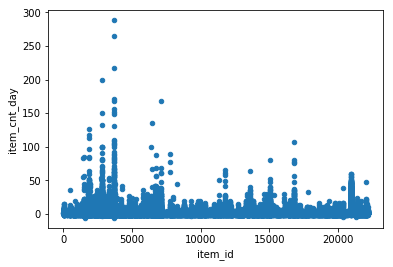

In [8]:
df.plot(x="item_id",y="item_cnt_day",kind="scatter")

In [9]:
df["date"]=pd.to_datetime(df["date"])

In [10]:
df.head()

,date,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,59,22154,999.00,1
1,2013-03-01,25,2552,899.00,1
2,2013-05-01,25,2552,899.00,-1
3,2013-06-01,25,2554,1709.05,1
4,2013-01-15,25,2555,1099.00,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE62B95860>,
      dtype=object)

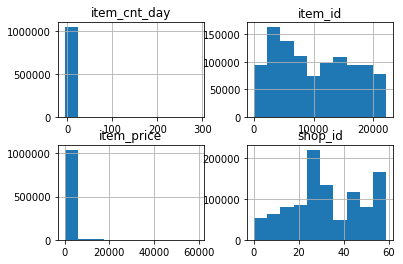

In [11]:
df.hist()

In [12]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation between features')

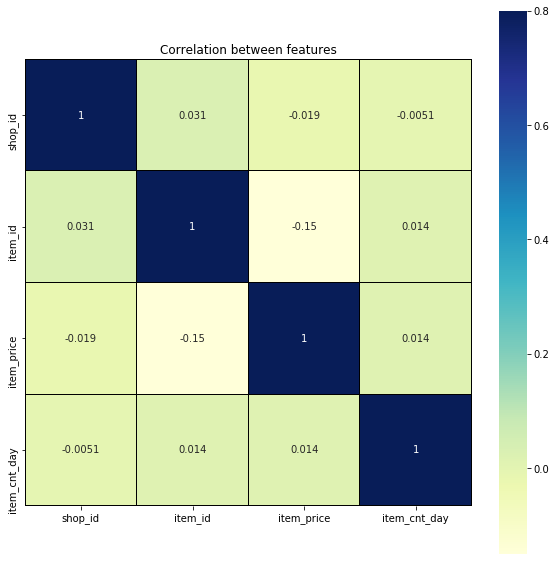

In [13]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [14]:
df.drop(columns="date",axis=1,inplace=True)

In [15]:
df.head()

,shop_id,item_id,item_price,item_cnt_day
0,59,22154,999.00,1
1,25,2552,899.00,1
2,25,2552,899.00,-1
3,25,2554,1709.05,1
4,25,2555,1099.00,1


In [16]:
df.drop(columns="item_price",axis=1,inplace=True)

In [17]:
df.head(2)

,shop_id,item_id,item_cnt_day
0,59,22154,1
1,25,2552,1


In [18]:
df.sort_values(by="shop_id").head()

,shop_id,item_id,item_cnt_day
39034,0,13354,1
181008,0,7978,1
181009,0,7978,1
181010,0,7978,1
181011,0,7977,1


In [19]:
df.isnull().sum()

shop_id         0
item_id         0
item_cnt_day    0
dtype: int64

In [20]:
x=df[["shop_id"]]

In [21]:
y=df[["item_cnt_day"]]

In [22]:
x.head()

,shop_id
0,59
1,25
2,25
3,25
4,25


In [23]:
y.head()

,item_cnt_day
0,1
1,1
2,-1
3,1
4,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE637125F8>]],
      dtype=object)

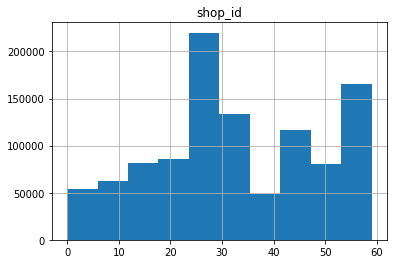

In [24]:
x.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE637123C8>]],
      dtype=object)

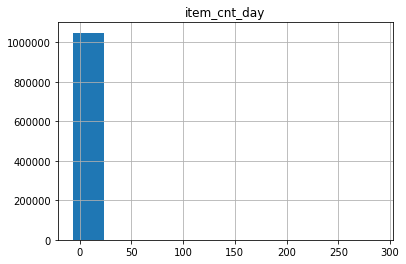

In [25]:
y.hist()

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [27]:
x_train.count()

shop_id    838860
dtype: int64

In [28]:
x_train.shape

(838860, 1)

In [29]:
x_test.shape

(209715, 1)

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)

model.fit(x_train, y_train)

C:\Users\premnath\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\premnath\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
ypred=model.predict(x_test)

In [33]:
ypred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,ypred)

0.8996495243544811

In [52]:
#create a sample submission file and submit
pred=pd.DataFrame(ypred)
sub=pd.read_csv("C:\\Users\\premnath\\Desktop\\prem\\sample_submission.csv")
datasets=pd.concat([sub["ID"],pred],axis=1)
datasets.coloumns=["ID","item_cnt_day"]
datasets.to_csv("sample_submission.csv",index=False)

C:\Users\premnath\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [47]:
pred.head()

,0
0,1
1,1
2,1
3,1
4,1
